In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')
%cd drive/MyDrive/UML Project/instacart-market-basket-analysis

#reading data from drive
orders = pd.read_csv('orders.csv')
#data = data.rename(columns={0: "UserID", 1: "ProductID", 2: "Rating", 3:"Timestamp"})

orders

Mounted at /content/drive/
/content/drive/MyDrive/UML Project/instacart-market-basket-analysis


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
#reading order_products_train.csv file which contains Data curated on the products added to cart and their order
order_prod = pd.read_csv('order_products_train.csv')
order_prod

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
#reading order_products_train.csv file which provides information for 21 different departments
departments = pd.read_csv('departments.csv')
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
#reading order_products_train.csv file which categorises each data based on department and Aisle
products = pd.read_csv('products.csv')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
# Merging orders and order_prod dataframes on order_id
merged = pd.merge(orders, order_prod, on=["order_id", "order_id"])

In [ ]:
# Merging previous dataframe and products dataframes on product id
merged = pd.merge(merged, products, on=["product_id", "product_id"])

In [ ]:
# Merging previous dataframe and departments dataframes on department id
merged = pd.merge(merged, departments, on=["department_id", "department_id"])
merged

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,1182500,204218,train,4,0,12,7.0,36391,2,1,Steamables Russet Potatoes,100,21,missing
1384613,2194824,204805,train,12,4,22,6.0,44258,12,0,Gummy Bears Made With Real Fruit Juice,100,21,missing
1384614,1172540,204881,train,14,3,16,22.0,5174,9,1,Mayonnaise Pouch,100,21,missing
1384615,5643,205406,train,26,1,8,20.0,2554,7,0,Snacking Lupini Beans Hot Pepper,100,21,missing


In [ ]:
# Making copy of merged dataframe to work on different subsets of data columns
new_merged = merged.copy()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,1182500,204218,train,4,0,12,7.0,36391,2,1,Steamables Russet Potatoes,100,21,missing
1384613,2194824,204805,train,12,4,22,6.0,44258,12,0,Gummy Bears Made With Real Fruit Juice,100,21,missing
1384614,1172540,204881,train,14,3,16,22.0,5174,9,1,Mayonnaise Pouch,100,21,missing
1384615,5643,205406,train,26,1,8,20.0,2554,7,0,Snacking Lupini Beans Hot Pepper,100,21,missing


In [ ]:
# Grouping by to check the highest selling products 
new_merged.groupby('product_name')['order_id'].count().sort_values(ascending = False)

product_name
Banana                                                     18726
Bag of Organic Bananas                                     15480
Organic Strawberries                                       10894
Organic Baby Spinach                                        9784
Large Lemon                                                 8135
                                                           ...  
Sauvignon Blanc, Marlborough                                   1
Kids Free & Clear Unisex 3T-4T 32-40 lbs Training Pants        1
Savory Beef & Pork Pierogi                                     1
Savory Blend Handmade Granola                                  1
Crab Bisque New England Style                                  1
Name: order_id, Length: 39123, dtype: int64

In [ ]:
# Checking which product has highest reordered count for subset of products being ordered >1000 times
new_merged = new_merged.groupby('product_name').agg({'user_id': 'count', 'reordered': 'sum'}).reset_index()
new_merged1 = new_merged[new_merged['user_id'] > 1000]
new_merged1

,product_name,user_id,reordered
326,100% Raw Coconut Water,1298,1027
342,100% Recycled Paper Towels,1183,732
381,100% Whole Wheat Bread,2298,1752
541,2% Reduced Fat Milk,1540,1248
2000,Apple Honeycrisp Organic,2252,1624
...,...,...,...
36985,Vanilla Almond Breeze Almond Milk,1277,977
37944,Whipped Cream Cheese,1078,772
38375,Whole Milk,1335,1088
38795,Yellow Bell Pepper,1166,670


In [ ]:
# Calculating the probability of an item being reordered
new_merged1['prop'] = new_merged['reordered']/ new_merged['user_id']
new_merged1

<ipython-input-57-3b79c1d9770d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged1['prop'] = new_merged['reordered']/ new_merged['user_id']


,product_name,user_id,reordered,prop
326,100% Raw Coconut Water,1298,1027,0.791217
342,100% Recycled Paper Towels,1183,732,0.618766
381,100% Whole Wheat Bread,2298,1752,0.762402
541,2% Reduced Fat Milk,1540,1248,0.810390
2000,Apple Honeycrisp Organic,2252,1624,0.721137
...,...,...,...,...
36985,Vanilla Almond Breeze Almond Milk,1277,977,0.765074
37944,Whipped Cream Cheese,1078,772,0.716141
38375,Whole Milk,1335,1088,0.814981
38795,Yellow Bell Pepper,1166,670,0.574614


In [ ]:
# sorting to get the prroduct having the highest reorder probability
new_merged1.sort_values(by = 'user_id', ascending = False)

,product_name,user_id,reordered,prop
2814,Banana,18726,16557,0.884172
2641,Bag of Organic Bananas,15480,13362,0.863178
25128,Organic Strawberries,10894,8603,0.789701
22496,Organic Baby Spinach,9784,8055,0.823283
17475,Large Lemon,8135,5923,0.728089
...,...,...,...,...
23027,Organic Coconut Milk,1045,565,0.540670
24744,"Organic Red Radish, Bunch",1041,685,0.658021
31725,Shredded Mild Cheddar Cheese,1036,637,0.614865
5843,Cherubs Heavenly Salad Tomatoes,1024,701,0.684570


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

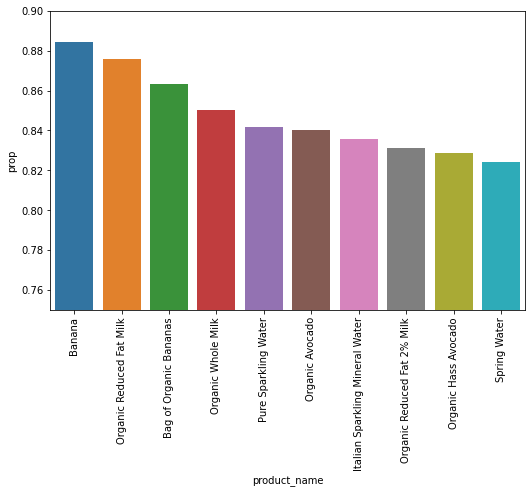

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot to visualise the top 10 products based on its reordered probability calculated previously
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [8.50, 5.50]
sns.barplot(x = 'product_name',
            y = 'prop',
            data = new_merged1.sort_values(by = 'prop', ascending=False).head(10))
ax.set_ylim(0.75, 0.9)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

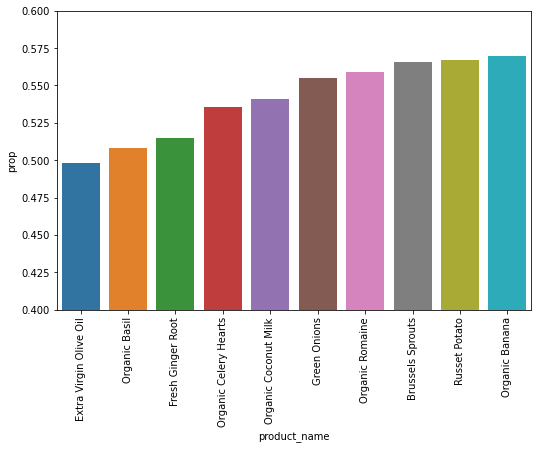

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot to visualise the bottom 10 products based on its reordered probability calculated previously
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [8.50, 5.50]
sns.barplot(x = 'product_name',
            y = 'prop',
            data = new_merged1.sort_values(by = 'prop', ascending=True).head(10))
ax.set_ylim(0.4, 0.6)

plt.xticks(rotation=90)

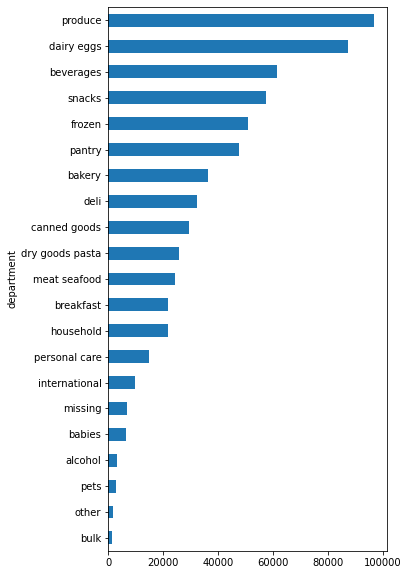

In [ ]:
# Plot to check the popularity of all departments based on customer orders
merged.groupby('department')['order_id'].nunique().sort_values().plot.barh(figsize = (5,10))

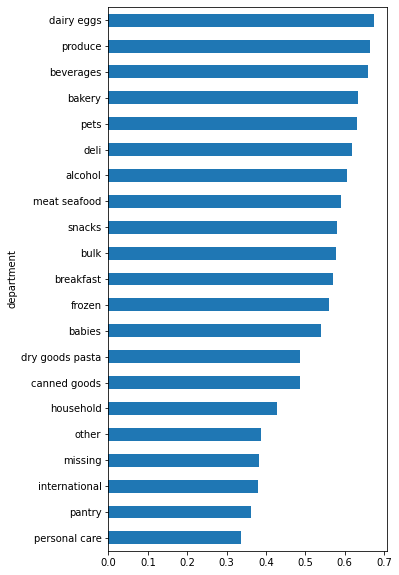

In [ ]:
# Plot to check the mean reordered value for each department
merged.groupby('department')['reordered'].mean().sort_values().plot.barh(figsize = (5,10))

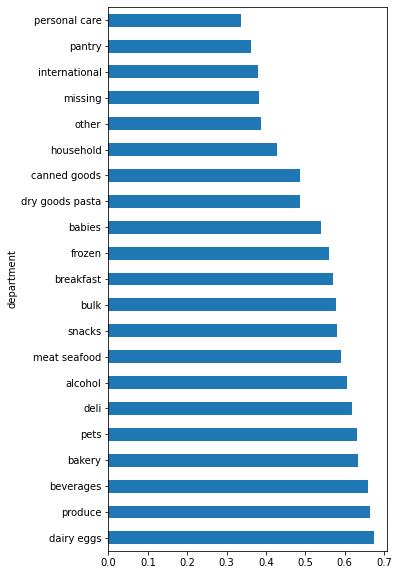

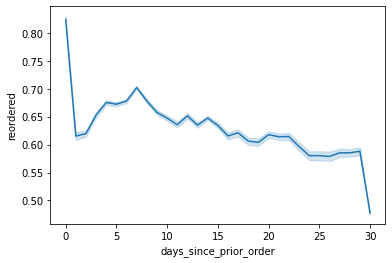

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot to check the relationship with days since prior order and reordered 
sns.lineplot( x = "days_since_prior_order",
             y = "reordered",
             data = merged)

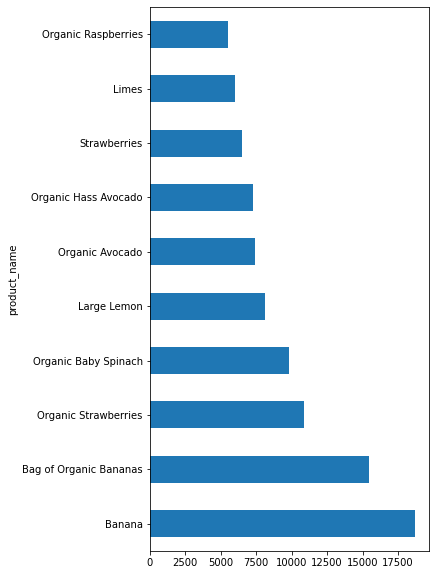

In [ ]:
# filtering out data just for produce department and checking the highest selling products
merged1 = merged[merged['department'] == 'produce']
merged1.groupby('product_name')['order_id'].nunique().sort_values(ascending=False).head(10).plot.barh(figsize = (5,10))

In [ ]:
merged2 = merged.copy()
merged2

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,1182500,204218,train,4,0,12,7.0,36391,2,1,Steamables Russet Potatoes,100,21,missing
1384613,2194824,204805,train,12,4,22,6.0,44258,12,0,Gummy Bears Made With Real Fruit Juice,100,21,missing
1384614,1172540,204881,train,14,3,16,22.0,5174,9,1,Mayonnaise Pouch,100,21,missing
1384615,5643,205406,train,26,1,8,20.0,2554,7,0,Snacking Lupini Beans Hot Pepper,100,21,missing


In [ ]:
# Setting up new columns based on day of week
merged2.loc[merged2['order_dow'].isin([0,1]), 'Weekday_Tag'] = 'Weekend'
merged2.loc[merged2['order_dow'].isin([2,3,4,5,6]), 'Weekday_Tag'] = 'Weekday'

# Adding a new column, Hour_tag containing categorical values based on integer values
merged2.loc[merged2['order_hour_of_day'].isin([5,6,7,8,9,10,11]), 'Hour_Tag'] = 'Morning'
merged2.loc[merged2['order_hour_of_day'].isin([12,13,14,15,16,17]), 'Hour_Tag'] = 'Lunch'
merged2.loc[merged2['order_hour_of_day'].isin([18,19,20,21,22,23]), 'Hour_Tag'] = 'Dinner'
merged2.loc[merged2['order_hour_of_day'].isin([24,0,1,2,3,4]), 'Hour_Tag'] = 'Late_Night'

In [ ]:
merged2

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,Weekday_Tag,Hour_Tag
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,Weekday,Morning
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages,Weekend,Morning
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages,Weekend,Lunch
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages,Weekday,Morning
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages,Weekday,Dinner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,1182500,204218,train,4,0,12,7.0,36391,2,1,Steamables Russet Potatoes,100,21,missing,Weekend,Lunch
1384613,2194824,204805,train,12,4,22,6.0,44258,12,0,Gummy Bears Made With Real Fruit Juice,100,21,missing,Weekday,Dinner
1384614,1172540,204881,train,14,3,16,22.0,5174,9,1,Mayonnaise Pouch,100,21,missing,Weekday,Lunch
1384615,5643,205406,train,26,1,8,20.0,2554,7,0,Snacking Lupini Beans Hot Pepper,100,21,missing,Weekend,Morning


Text(0, 0.5, '')

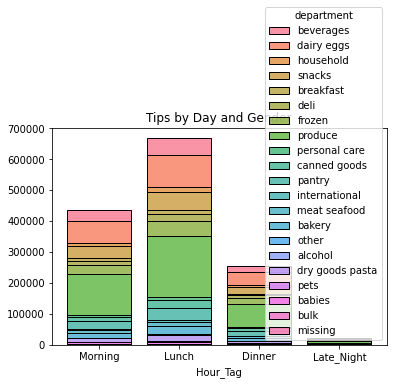

In [ ]:
import seaborn as sns

# Plot to check different order frequency based on the hour of the day
ax = sns.histplot(
    merged2,
    x='Hour_Tag',
    hue='department',
    multiple='stack',
    shrink=0.8
)

ax.set_title('Tips by Day and Gender')
ax.set_ylabel(None)

In [ ]:
# Getting the data which come under top 80% of the ordered departments only
top80_orders = merged2['department'].value_counts(normalize=True)
cols_top80 = list(top80_orders[(top80_orders * 100).cumsum() < 80].index)
cols_top80

['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery']

In [ ]:
merged3 = merged2[merged2['department'].isin(cols_top80)]
merged3

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,Weekday_Tag,Hour_Tag
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,Weekday,Morning
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages,Weekend,Morning
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages,Weekend,Lunch
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages,Weekday,Morning
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages,Weekday,Dinner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309458,3246355,199252,train,23,6,12,15.0,49125,31,0,Variety Cake Caramel Red Velvet Chocolate Carrot,8,3,bakery,Weekday,Lunch
1309459,2567907,196063,train,8,2,9,30.0,33096,1,0,Halloween Vanilla Mini Cupcakes,8,3,bakery,Weekday,Morning
1309460,2567907,196063,train,8,2,9,30.0,30609,2,0,Assorted Halloween Cupcakes,8,3,bakery,Weekday,Morning
1309461,494782,200928,train,21,2,15,21.0,35706,1,1,Ancient Grains Bread,112,3,bakery,Weekday,Lunch


Text(0, 0.5, '')

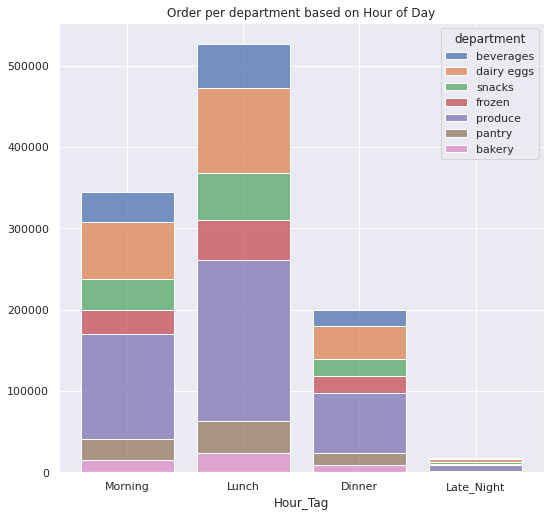

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8.7,8.27)})

# Again using the same plot to check the freqency of each department based on the time of day
ax = sns.histplot(
    merged3,
    x='Hour_Tag',
    hue='department',
    multiple='stack',
    shrink=0.8
)

ax.set_title('Order per department based on Hour of Day')
ax.set_ylabel(None)

Text(0, 0.5, '')

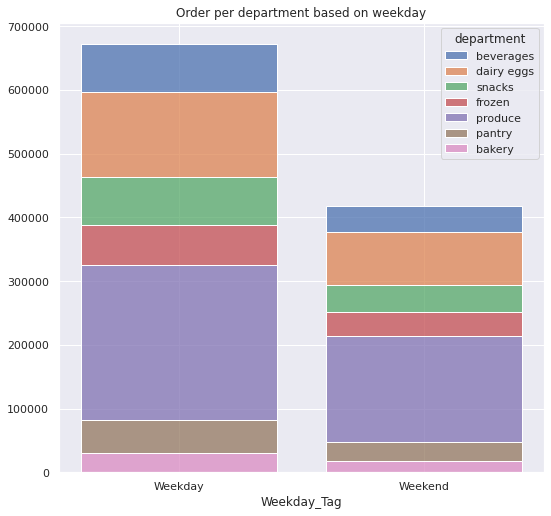

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8.7,8.27)})

# Using same plot to get relationship for weekday
ax = sns.histplot(
    merged3,
    x='Weekday_Tag',
    hue='department',
    multiple='stack',
    shrink=0.8
)

ax.set_title('Order per department based on weekday')
ax.set_ylabel(None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc4b409760>,
      dtype=object)

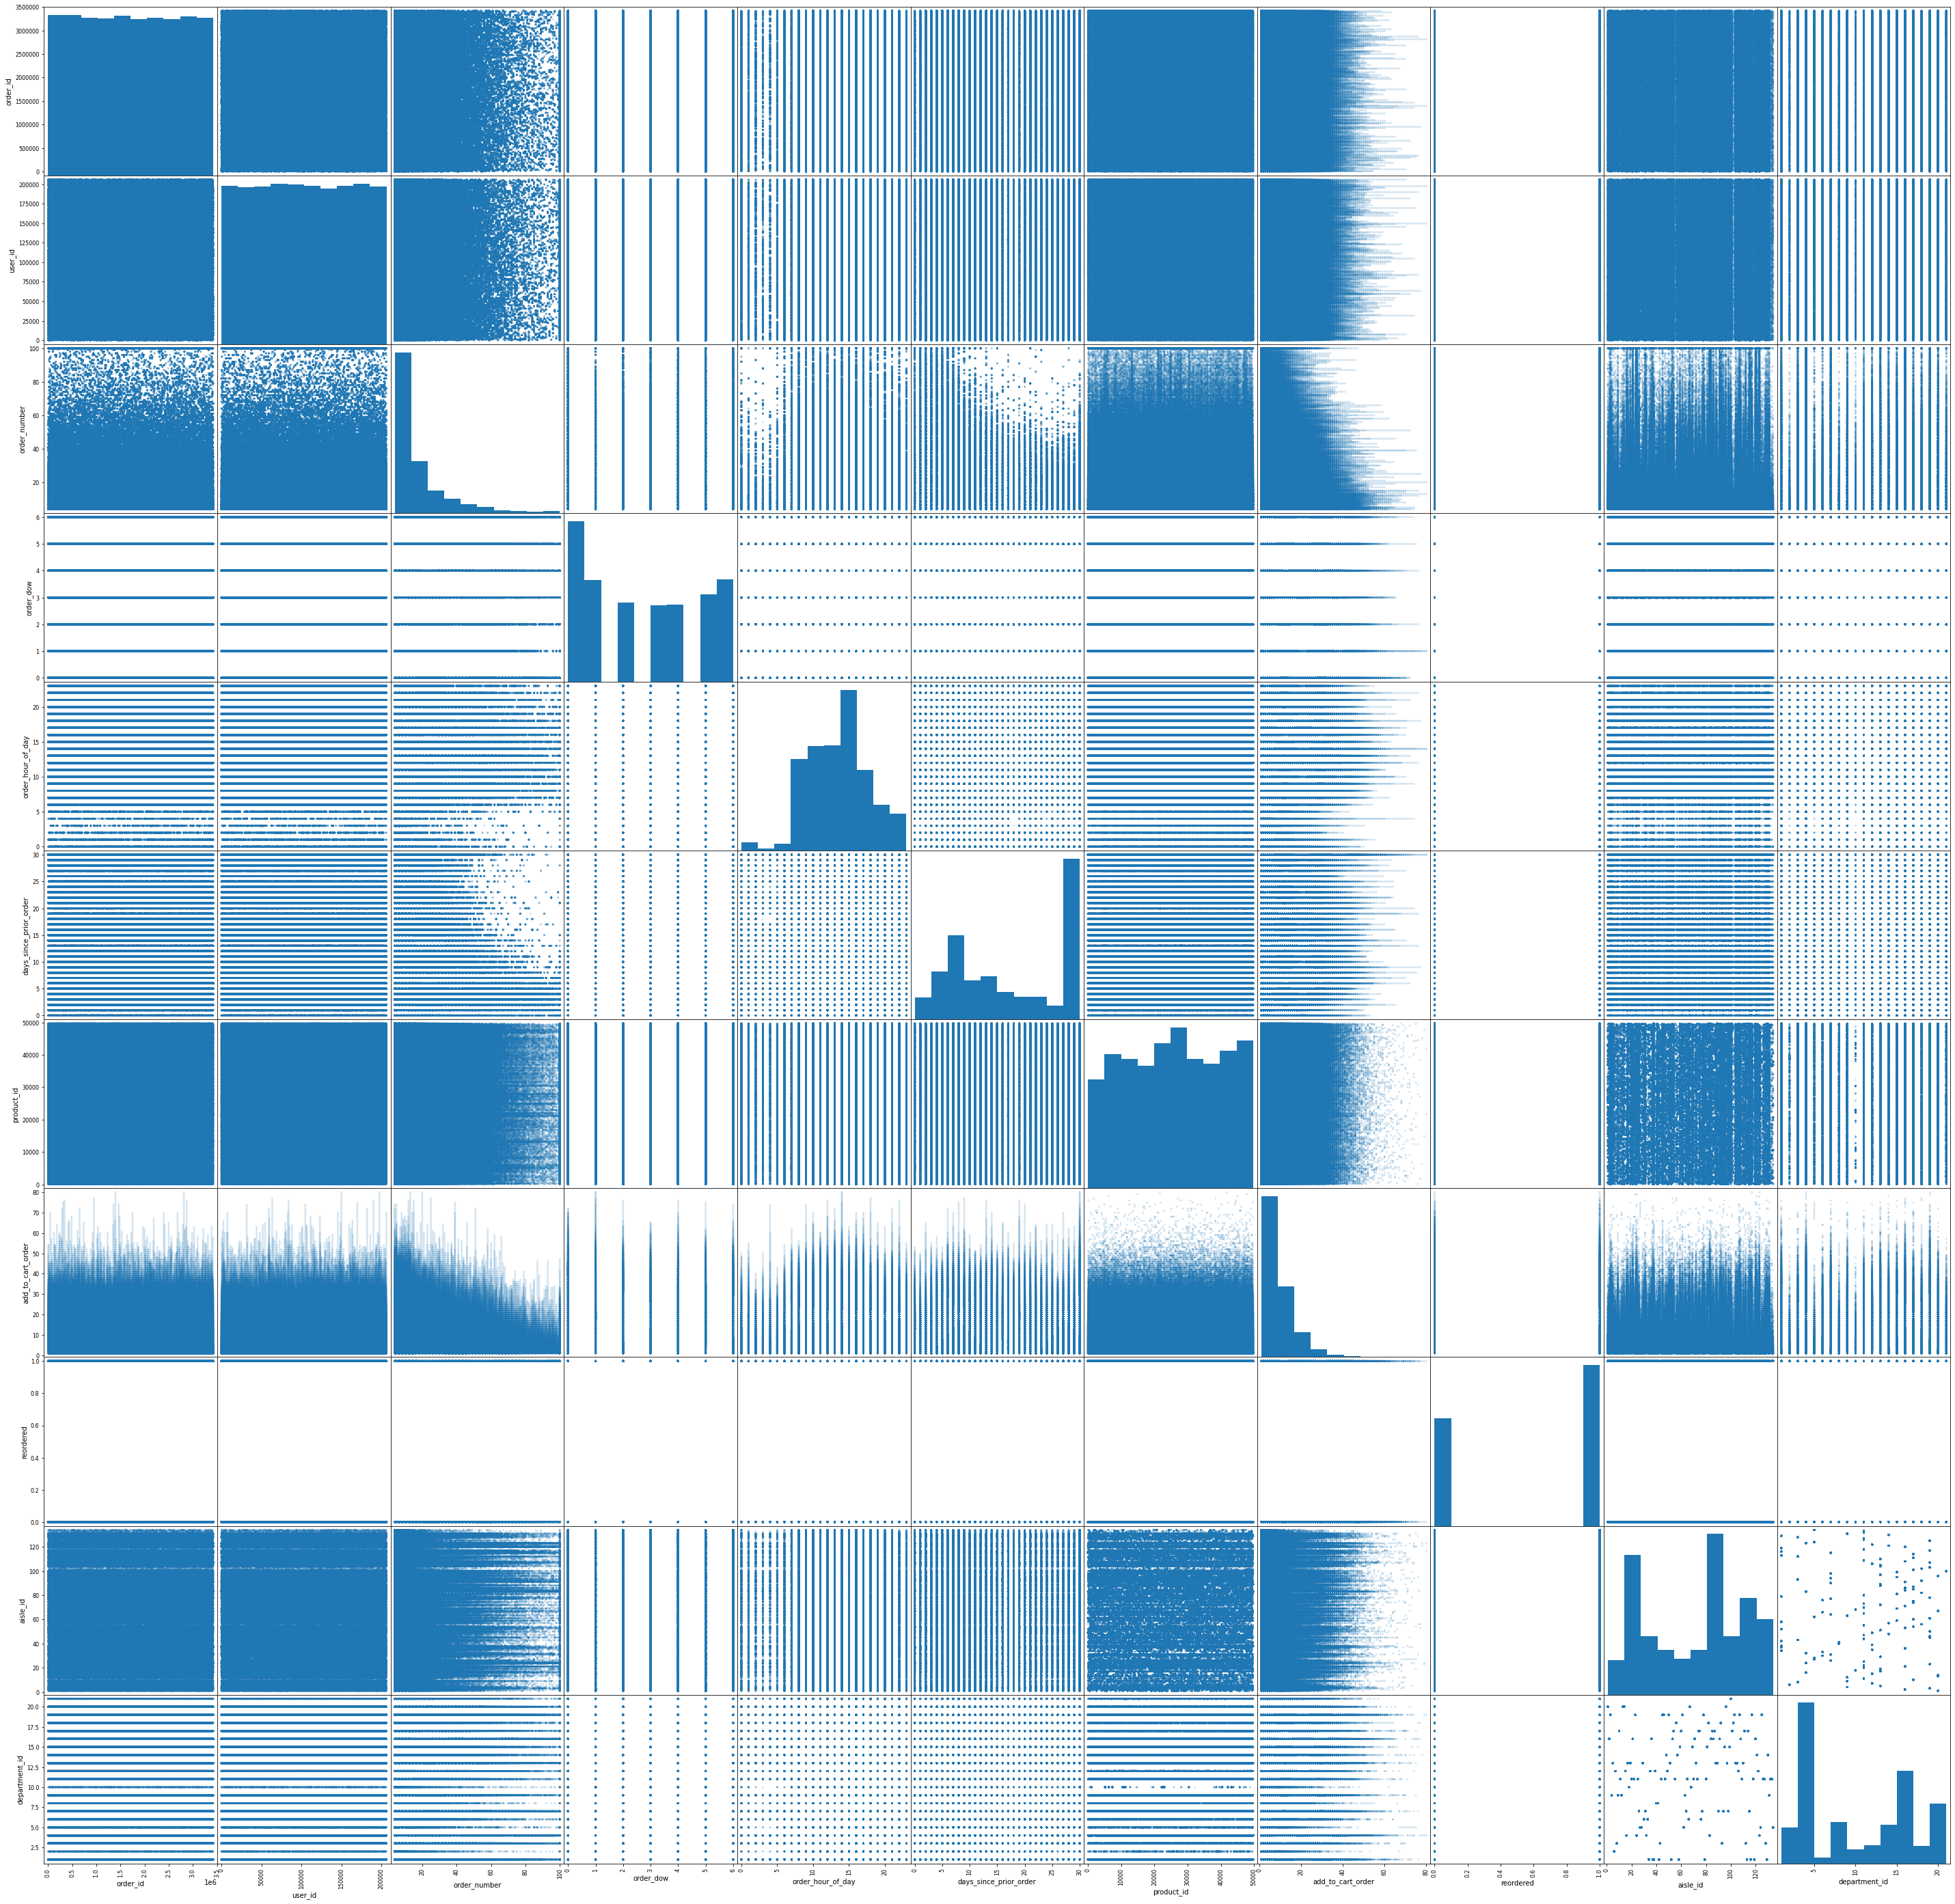

In [ ]:
pd.plotting.scatter_matrix(merged, alpha=0.2, figsize = (50,50))


# EDA

CUSTOMER ORDERS COUNT
DEPT WISE ORDERS

In [ ]:
user_count_dept = pd.crosstab(data['user_id'], data['department'])
user_count_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,0,0,2,2,1,0,0,2,0,1,...,0,0,0,1,0,1,0,0,1,10
206200,0,0,0,2,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,9,2
206203,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,2,3


In [ ]:
#d = merged[['order_hour_of_day', 'department_id', 'days_since_prior_order']]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(user_count_dept)
pca_samples = pca.transform(user_count_dept)

10
11
12
13
14
15
16
17
18
19


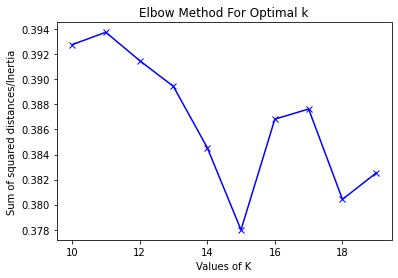

In [ ]:
Sum_of_squared_distances = []
silhouette = []

K = range(10,20)
for num_clusters in K :
  print(num_clusters)
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(pca_samples)
  #Sum_of_squared_distances.append(kmeans.inertia_)
  silhouette.append(silhouette_score(pca_samples, kmeans.labels_, metric='euclidean'))

plt.plot(K, silhouette,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=10,random_state=42).fit(pca_samples)
centers = clusterer.cluster_centers_
sc = silhouette_score(pca_samples, clusterer.labels_, metric='euclidean')
print(sc)
#c_preds = clusterer.predict(user_by_aisle_df)
print(centers)

0.39282266537930005
[[-3.10298835 -0.600205  ]
 [ 1.24890798 -1.452407  ]
 [13.77648358 -1.07534735]
 [-1.88180098  1.70718578]
 [ 4.26536975 -1.21451612]
 [ 6.51044532  3.23369236]
 [-0.95102743 -0.86179384]
 [ 0.84538611  5.53587765]
 [ 1.61718265  1.41705911]
 [ 8.08634146 -1.94881597]]


In [ ]:
clusterer.labels_

array([3, 5, 1, ..., 3, 5, 0], dtype=int32)

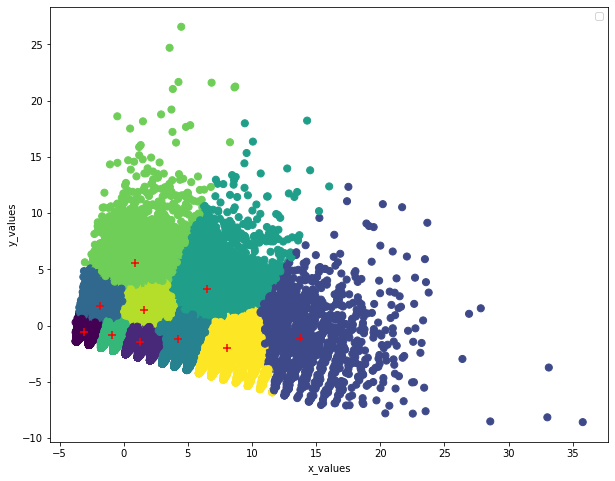

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

scatter = ax.scatter(pca_samples[:,0], pca_samples[:,1], c=clusterer.labels_, s=50)
for i, j in centers:
   ax.scatter(i, j, s=50, c='red', marker='+')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()